In [7]:
import msprime
from IPython.display import SVG

# Mutations

In [65]:
alleles = ["💩", "🎄", "🔥"]
model = msprime.MatrixMutationModel(
    alleles,
    root_distribution = [1.0, 0.0, 0.0],
    transition_matrix = [[0.0, 1.0, 0.0],
                         [0.0, 0.8, 0.2],
                         [1.0, 0.0, 0.0]]
)
ts = msprime.sim_ancestry(5, population_size=1e4, recombination_rate=1e-8, sequence_length=1000, random_seed=9)
mts = msprime.sim_mutations(ts, rate=5e-8, model=model, random_seed=1)

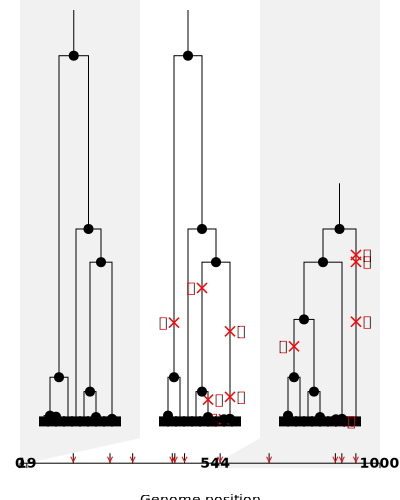

In [71]:
def do_svg(**kwargs):
    return mts.draw_svg(
        size=(400,500),
        node_labels={},
        mutation_labels={m.id: m.derived_state for m in mts.mutations()},
        symbol_size=10,
        force_root_branch=True,
        **kwargs
    )
    
SVG(mut_svg())

In [73]:
mut_svg(path="../figs/mutated_trees.svg");

# Sweeps

In [96]:
seqlen = 5e4
sweep_model = msprime.SweepGenicSelection(position=0.5*seqlen, s=0.01, start_frequency=0.5e-4, end_frequency=0.99, dt=1e-6)
sts = msprime.sim_ancestry(
    9,
    model=[sweep_model, msprime.StandardCoalescent()],
    population_size=1e4,
    recombination_rate=1e-8,
    sequence_length=seqlen,
    random_seed=9,
)


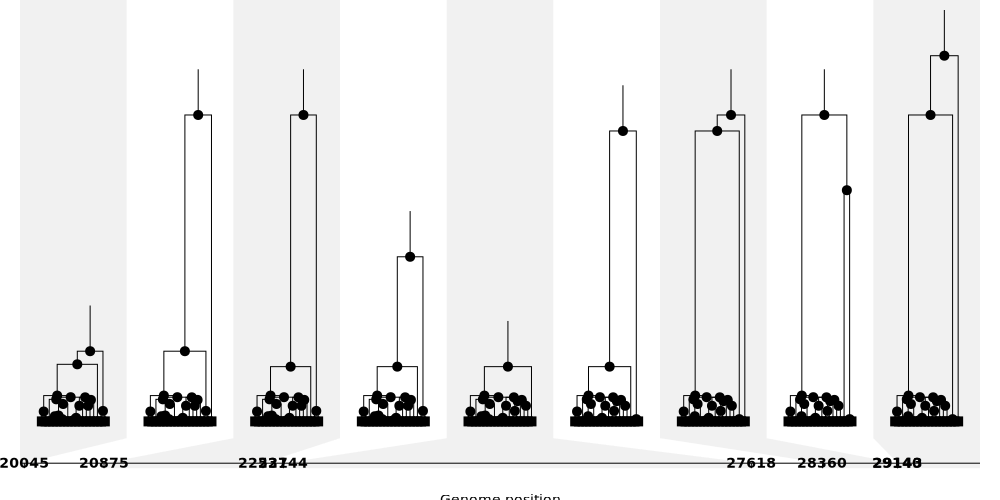

In [100]:
def sel_svg(**kwargs):
    return sts.draw_svg(
        size=(1000,500),
        x_lim=[2e4, 3e4],
        node_labels={},
        mutation_labels={m.id: m.derived_state for m in mts.mutations()},
        symbol_size=10,
        force_root_branch=True,
        **kwargs
    )
    
SVG(sel_svg())

In [101]:
sel_svg(path="../figs/sweep_trees.svg");

In [98]:
help(sts.draw_svg)

Help on method draw_svg in module tskit.trees:

draw_svg(path=None, *, size=None, x_scale=None, time_scale=None, tree_height_scale=None, node_labels=None, mutation_labels=None, root_svg_attributes=None, style=None, order=None, force_root_branch=None, symbol_size=None, x_axis=None, x_label=None, x_lim=None, y_axis=None, y_label=None, y_ticks=None, y_gridlines=None, **kwargs) method of tskit.trees.TreeSequence instance
    Return an SVG representation of a tree sequence.
    
    When working in a Jupyter notebook, use the ``IPython.display.SVG`` function
    to display the SVG output from this function inline in the notebook::
    
        >>> SVG(tree.draw_svg())
    
    The visual elements in the svg are
    `grouped <https://www.w3.org/TR/SVG2/struct.html#Groups>`_
    for easy styling and manipulation. The entire visualization with trees and X
    axis is contained within a group of class ``tree-sequence``. Each tree in
    the displayed tree sequence is contained in a group of cla